In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats
from scipy.stats import skew
from scipy.stats import mode
from scipy.optimize import minimize
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [16]:
Insurance_data=pd.read_csv('d:\\data science\\csv\\carInsurance_train.csv')
Insurance_data.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


In [17]:
Insurance_data.describe()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,41.214750,0.014500,1532.937250,0.49275,0.133000,15.721250,2.607250,48.706500,0.717500,0.401000
std,1154.844867,11.550194,0.119555,3511.452489,0.50001,0.339617,8.425307,3.064204,106.685385,2.078647,0.490162
min,1.000000,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,1000.750000,32.000000,0.000000,111.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,2000.500000,39.000000,0.000000,551.500000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,3000.250000,49.000000,0.000000,1619.000000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,4000.000000,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


In [18]:
Insurance_data.describe(include="object")

,Job,Marital,Education,Communication,LastContactMonth,Outcome,CallStart,CallEnd
count,3981,4000,3831,3098,4000,958,4000,4000
unique,11,3,3,2,12,3,3777,3764
top,management,married,secondary,cellular,may,failure,13:54:34,10:52:24
freq,893,2304,1988,2831,1049,437,3,3


In [13]:
Insurance_test=pd.read_csv("d:\\data science\\csv\\carInsurance_test.csv")
Insurance_test.head()
#Insurance_test.shape
Insurance_test.describe()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,0.0
mean,4500.500000,41.473000,0.013000,1398.298000,0.513000,0.12100,15.546000,2.50800,51.653000,0.806000,NaN
std,288.819436,12.051577,0.113331,2660.408024,0.500081,0.32629,8.370541,2.57732,109.024855,2.034331,NaN
min,4001.000000,18.000000,0.000000,-1980.000000,0.000000,0.00000,1.000000,1.00000,-1.000000,0.000000,NaN
25%,4250.750000,32.000000,0.000000,114.750000,0.000000,0.00000,8.000000,1.00000,-1.000000,0.000000,NaN
50%,4500.500000,39.000000,0.000000,517.500000,1.000000,0.00000,15.000000,2.00000,-1.000000,0.000000,NaN
75%,4750.250000,49.250000,0.000000,1609.750000,1.000000,0.00000,21.000000,3.00000,-1.000000,0.000000,NaN
max,5000.000000,92.000000,1.000000,41630.000000,1.000000,1.00000,31.000000,34.00000,586.000000,20.000000,NaN


## Visualizing the Data

In [19]:
imp_feats=['CarInsurance','Age','Balance','HHInsurance','CarLoan','NoOfContacts','DaysPassed','PrevAttempts']

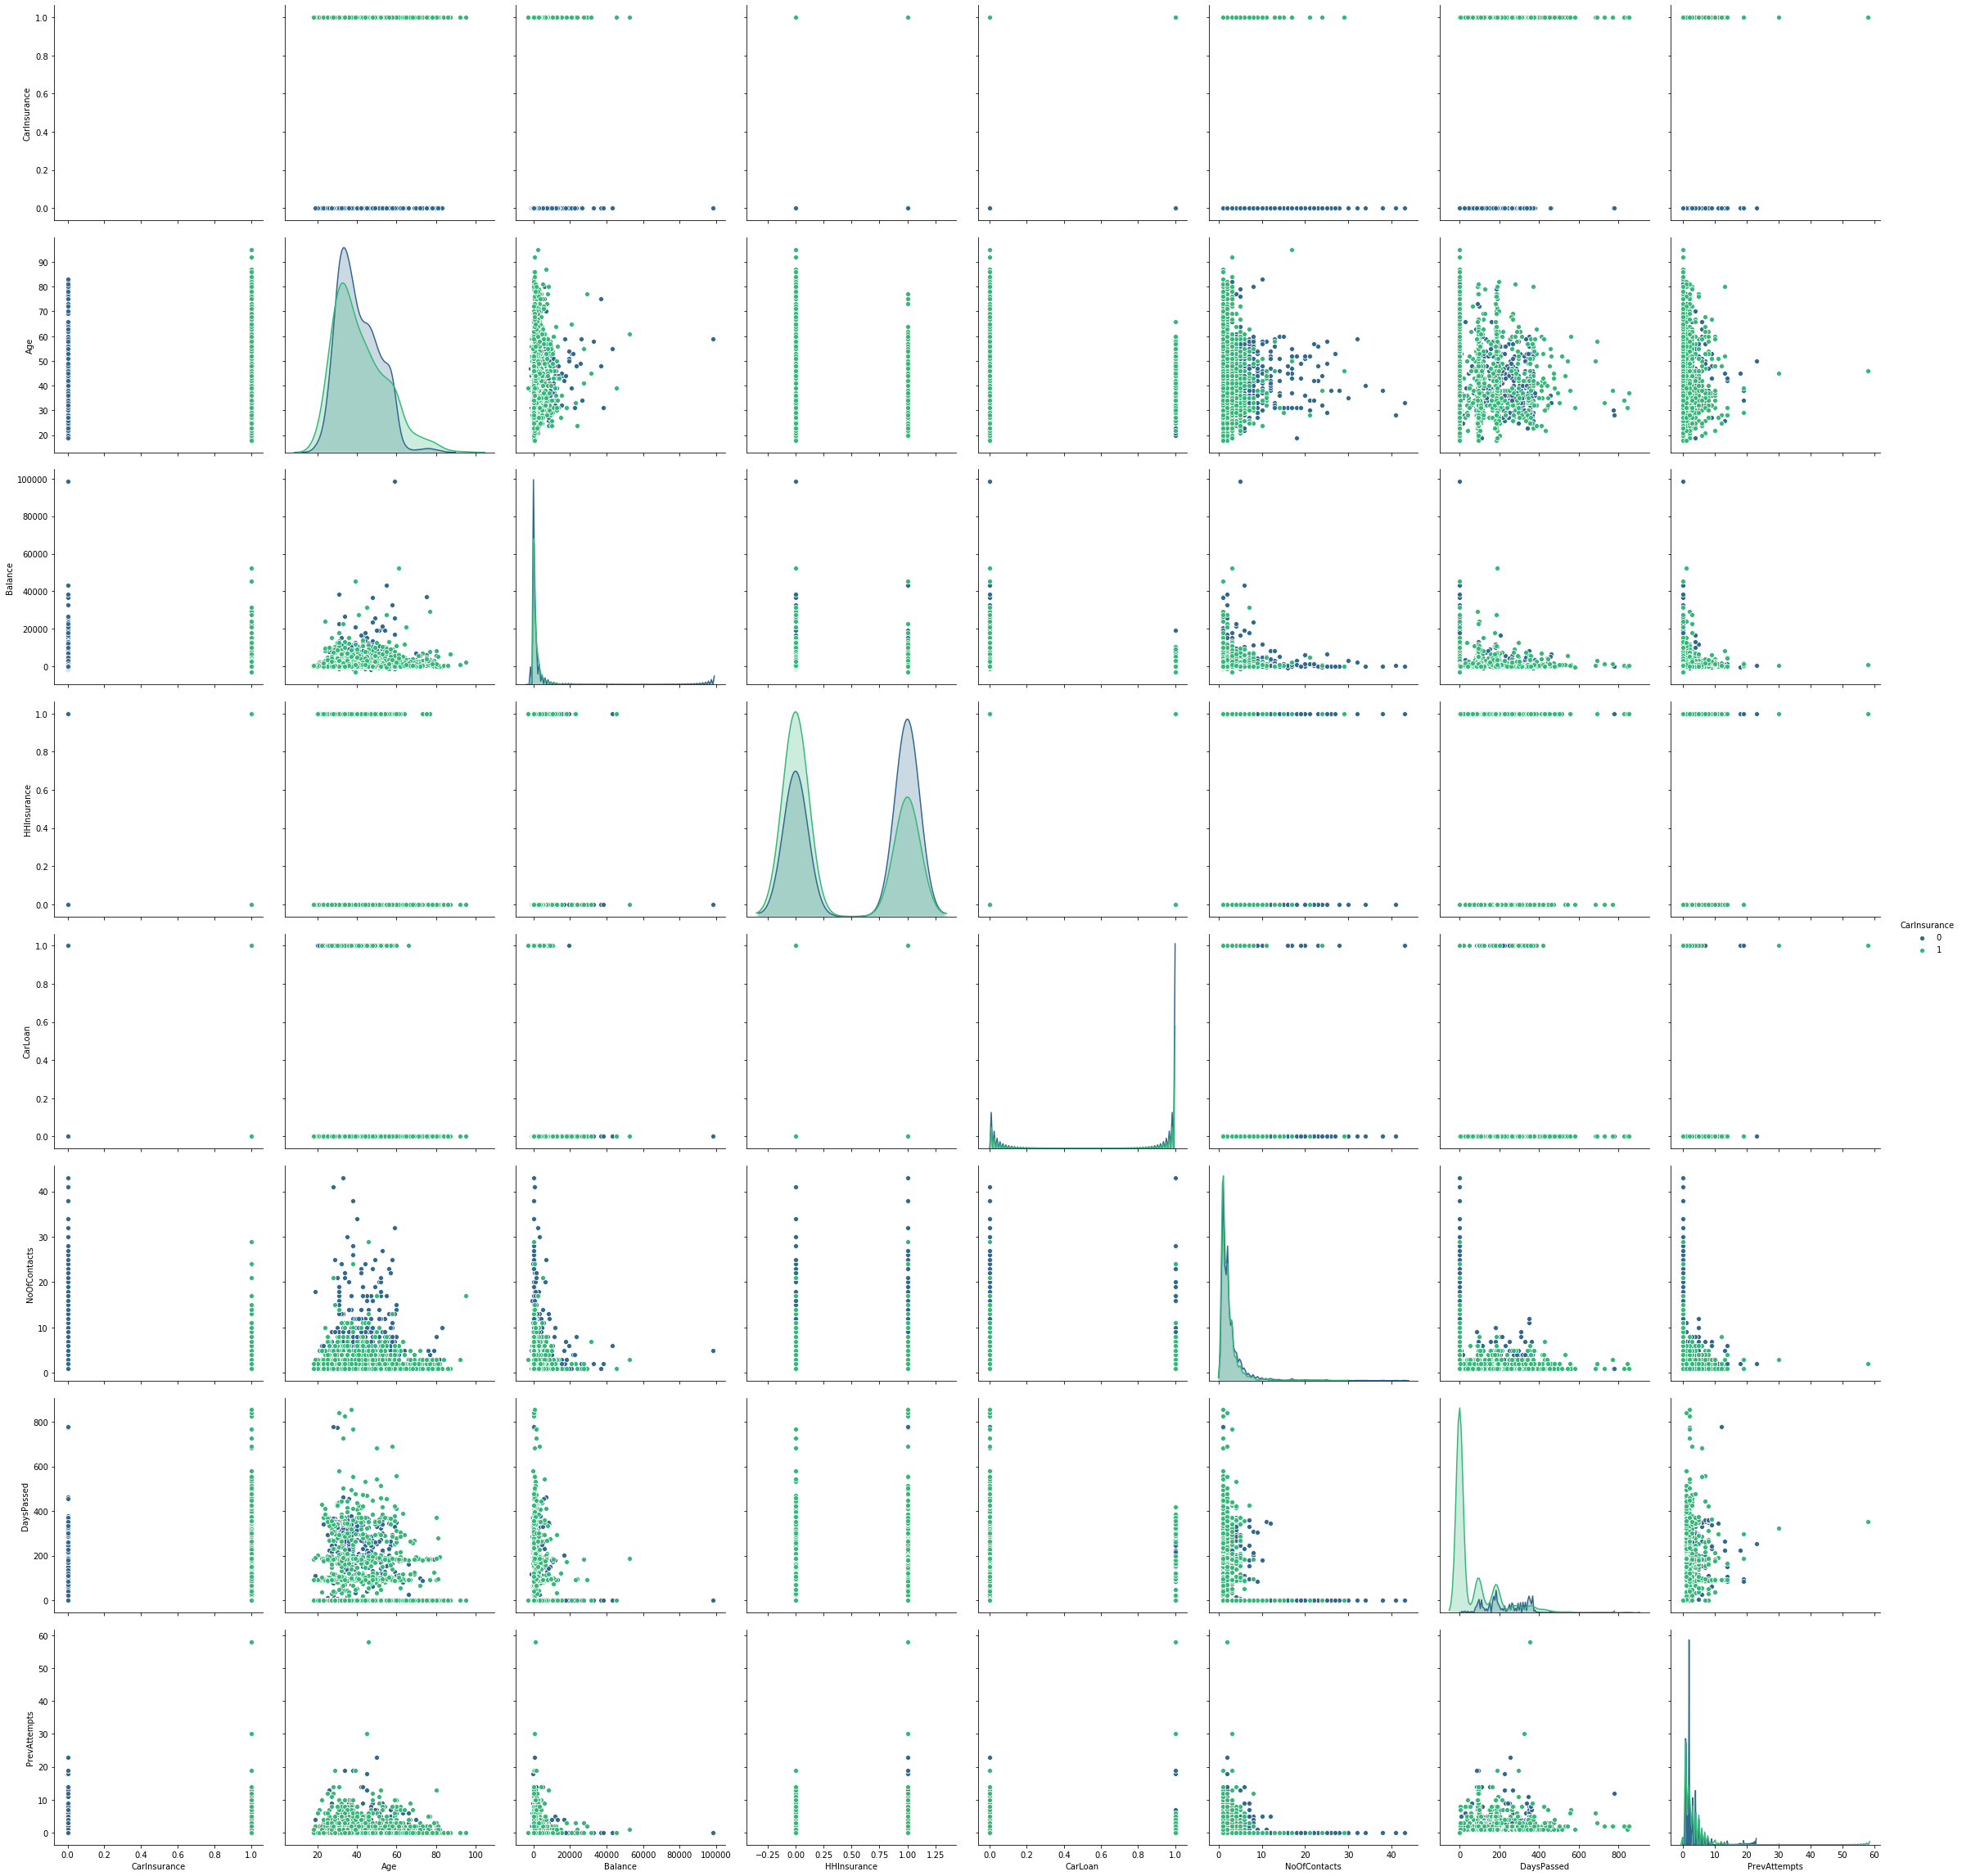

In [24]:
sns.pairplot(Insurance_data[imp_feats],hue='CarInsurance',palette='viridis',height=4)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:838: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  func(*plot_args, **plot_kwargs)


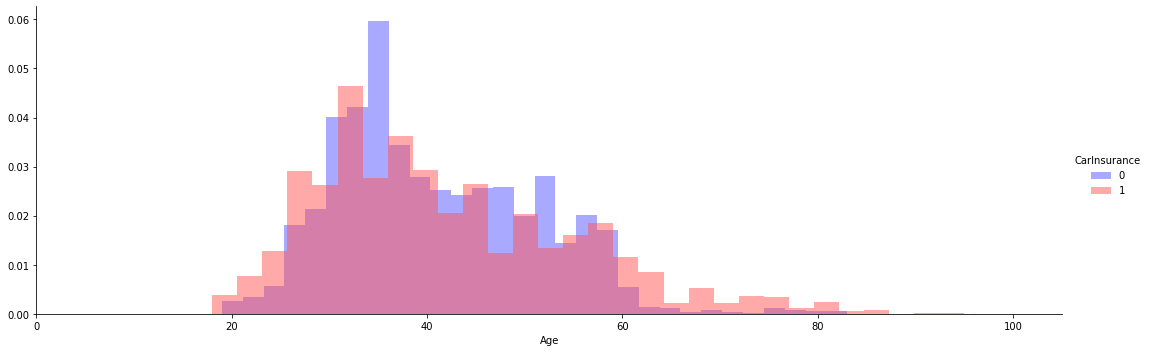

In [27]:
#Lets take a further look at age
facet=sns.FacetGrid(Insurance_data,hue='CarInsurance', size=5,aspect=3,palette='seismic')
facet.map(plt.hist,'Age',bins=30,alpha=0.5,normed=True)
facet.set(xlim=(0,Insurance_data.Age.max()+10))
facet.add_legend()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:194: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  op=op_str, alt_op=unsupported[op_str]


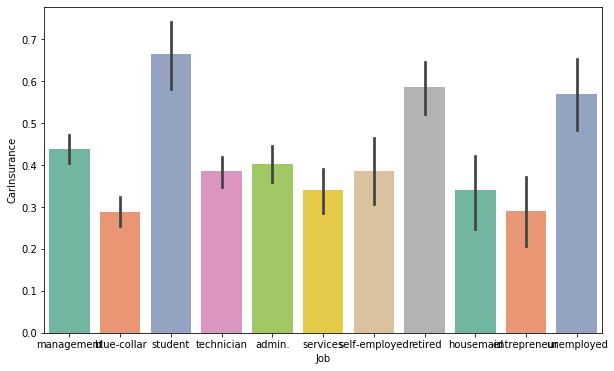

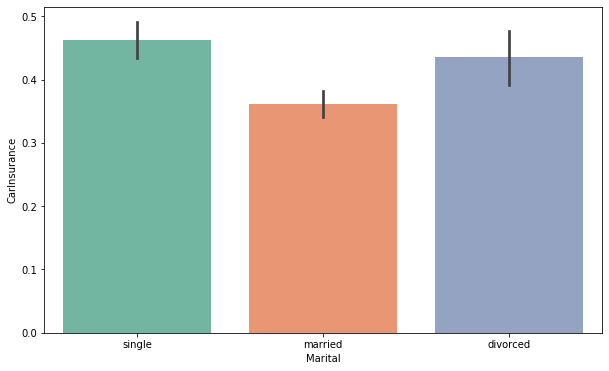

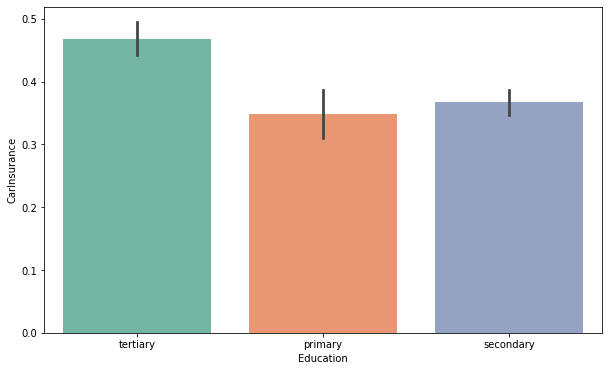

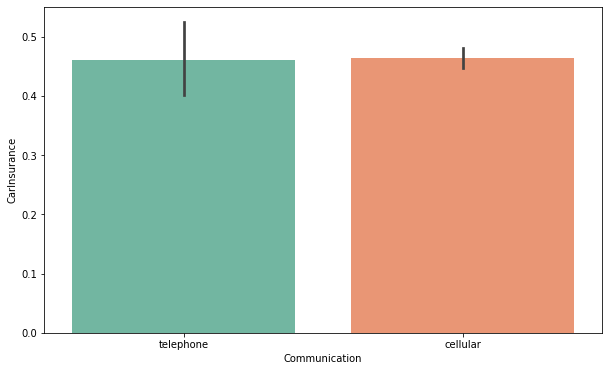

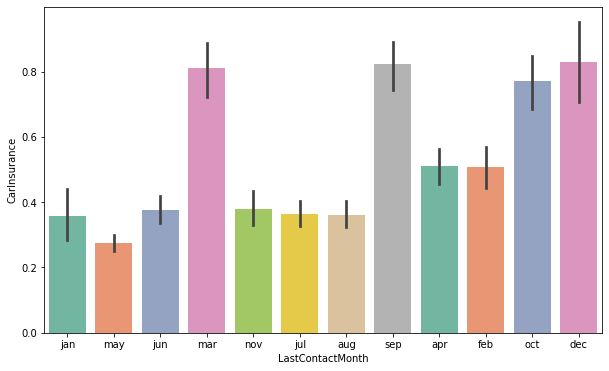

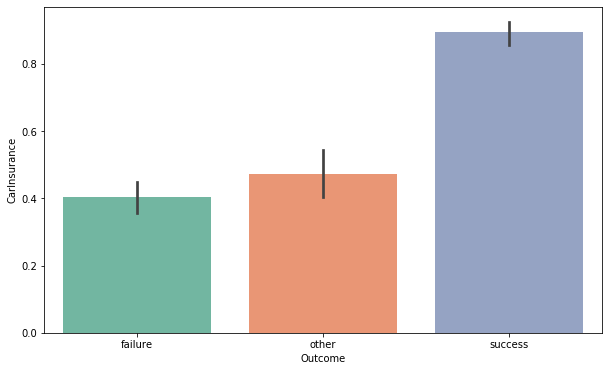

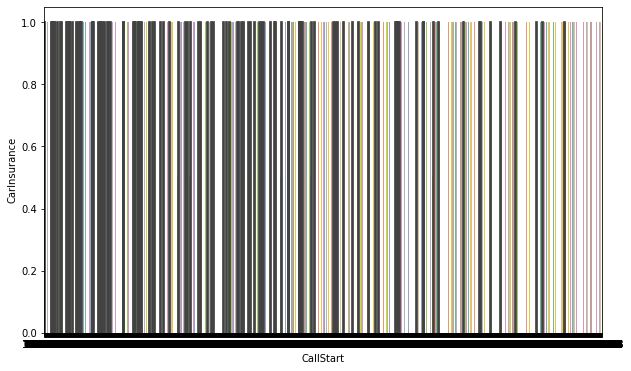

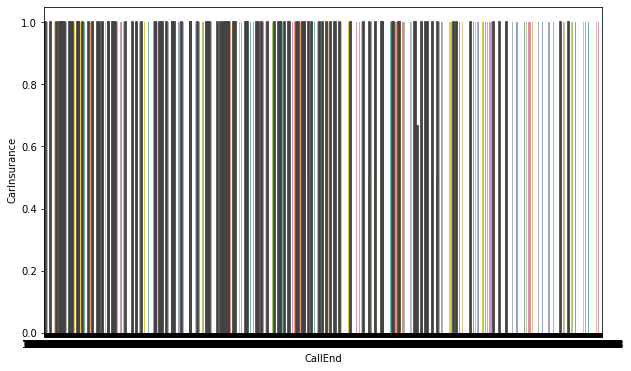

In [28]:
#Visualizing categorical features
categorical_col=Insurance_data.select_dtypes(include=['object'])
categorical_col_plot=categorical_col[(categorical_col!='CallStart')*(categorical_col!='CallEnd')]

#Looping over categorical variables and plotting
for feature in categorical_col_plot:
    plt.figure(figsize=(10,6))
    sns.barplot(feature,'CarInsurance',data=Insurance_data,palette='Set2')

In [32]:
#Remove Outliers
Insurance_data[Insurance_data.Balance>80000]

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance


In [31]:
#Removing above row
Insurance_data=Insurance_data.drop(Insurance_data[Insurance_data.index==1742].index)

## Handling Missing Data

In [35]:
#Merge the train and test Data to handle all missing values at once
merge_data=pd.concat([Insurance_data,Insurance_test],keys=['train','test'])
#Removing CarInsurance and ID
merge_data.drop(['CarInsurance','Id'],axis=1,inplace=True)
#getting shape of the merged data
merge_data.shape

(4999, 17)

In [38]:
#Now lets check the missing data in each column and their percentage

#Total missing values in every column
total_missing=merge_data.isnull().sum()

#Calculate Percentage
percentage=total_missing / merge_data.isnull().count()

#combine total and percentage values
NAs=pd.concat([total_missing,percentage],axis=1,keys=('Total','Percentage'))

#Getting columns where there are missing values
NAs[NAs.Total > 0].sort_values(by='Total',ascending=False)

,Total,Percentage
Outcome,3798,0.759752
Communication,1123,0.224645
Education,216,0.043209
Job,24,0.004801


## Replacing missing Values

In [39]:
merge_data_df=merge_data.copy()

In [40]:
merge_data_df.groupby('Outcome')['Age'].nunique()

Outcome
failure    56
other      49
success    60
Name: Age, dtype: int64

In [43]:
#Creating a new category for outcome variable where days passed = -1
merge_data_df.loc[merge_data_df['DaysPassed']==-1,'Outcome']='NoPrev'
merge_data_df.Outcome.value_counts(1)

NoPrev     0.759752
failure    0.109622
success    0.081016
other      0.049610
Name: Outcome, dtype: float64

In [45]:
#Filling missing values for communication with none
merge_data_df['Communication'].value_counts()


cellular     3529
telephone     347
Name: Communication, dtype: int64

In [47]:
merge_data_df['Communication'].fillna('None',inplace=True)

In [48]:
merge_data_df.Communication.value_counts()

cellular     3529
None         1123
telephone     347
Name: Communication, dtype: int64

Let us try to do mapping of Education to the Job since Job and Education are related

In [49]:
#Fill missing education with the most common education level by job
merge_data_df.Education.value_counts()

secondary    2489
tertiary     1600
primary       694
Name: Education, dtype: int64

In [74]:
#Create job education level mode mapping
#edu_mode=[]

#What are the different job types
job_types=merge_data_df.Job.value_counts().index #index is used to take first column in series and if we want to select 2nd
                                                 #then use values
#Checking which ob is most frequent
merge_data_df.Job.value_counts()

management       1113
blue-collar       937
technician        823
admin.            586
services          414
retired           326
self-employed     182
unemployed        164
student           158
entrepreneur      149
housemaid         123
Name: Job, dtype: int64

In [75]:
#Now we will create a mapping where the job mode of education is there 
#It means when there are many people in management job then what type of education they have taken
edu_mode=[]
for job in job_types:
    mode=merge_data_df[merge_data_df.Job==job]['Education'].value_counts().nlargest(1).index #nlargest() function takes no of value mentioned
    edu_mode=np.append(edu_mode,mode)
edu_mode 
edu_map=pd.Series(edu_mode,index=merge_data_df.Job.value_counts().index)
edu_map

management        tertiary
blue-collar      secondary
technician       secondary
admin.           secondary
services         secondary
retired          secondary
self-employed     tertiary
unemployed       secondary
student          secondary
entrepreneur      tertiary
housemaid          primary
dtype: object

In [79]:
#Apply the mapping to missing education obs. we will replace education now by jobs value
for j in job_types:
    merge_data_df.loc[(merge_data_df.Education.isnull()) &
                      (merge_data_df['Job']==j),'Education']=edu_map.loc[edu_map.index==j][0]

In [80]:
#For those that are not getting mapped we will create a new category called None
merge_data_df.Education.fillna('None',inplace=True)

#### Treating 11 Missing Values

In [89]:
#How many jobs are null
merge_data_df['Job'].isnull().sum()

0

In [87]:
#Fill missing values with None
merge_data_df.Job.fillna('None',inplace=True)

In [88]:
#Check if there are still any missing values in data
merge_data_df.isnull().sum()

Age                 0
Job                 0
Marital             0
Education           0
Default             0
Balance             0
HHInsurance         0
CarLoan             0
Communication       0
LastContactDay      0
LastContactMonth    0
NoOfContacts        0
DaysPassed          0
PrevAttempts        0
Outcome             0
CallStart           0
CallEnd             0
dtype: int64

In [91]:
#Seperating numerical and categorical variables
numeric_dtypes=merge_data_df.select_dtypes(include=[np.number]).columns.tolist()

In [92]:
numeric_dtypes

['Age',
 'Default',
 'Balance',
 'HHInsurance',
 'CarLoan',
 'LastContactDay',
 'NoOfContacts',
 'DaysPassed',
 'PrevAttempts']

In [93]:
merge_data_df_num=merge_data_df[numeric_dtypes]

In [98]:
categorical_dtypes=merge_data_df.select_dtypes(include=['object']).columns.tolist()
categorical_dtypes

['Job',
 'Marital',
 'Education',
 'Communication',
 'LastContactMonth',
 'Outcome',
 'CallStart',
 'CallEnd']

In [101]:
merge_data_df_cat=merge_data_df[['Job', 'Marital', 'Education','Communication','LastContactMonth','Outcome']]

In [102]:
merge_data_df_cat.head()

Job  Marital Education Communication LastContactMonth  \
train 0   management   single  tertiary     telephone              jan   
      1  blue-collar  married   primary          None              may   
      2   management   single  tertiary      cellular              jun   
      3      student   single   primary      cellular              may   
      4   management  married  tertiary      cellular              jun   

         Outcome  
train 0   NoPrev  
      1   NoPrev  
      2  failure  
      3   NoPrev  
      4   NoPrev

In [103]:
#Create dummy Variables
merge_data_df_cat_dummies=pd.get_dummies(merge_data_df_cat)

In [104]:
#Combine numeric and dummy variables
Insurance_data_dummy=pd.concat([merge_data_df_num,merge_data_df_cat_dummies],axis=1)

In [105]:
Insurance_data_dummy.head()

Age  Default  Balance  HHInsurance  CarLoan  LastContactDay  \
train 0   32        0     1218            1        0              28   
      1   32        0     1156            1        0              26   
      2   29        0      637            1        0               3   
      3   25        0      373            1        0              11   
      4   30        0     2694            0        0               3   

         NoOfContacts  DaysPassed  PrevAttempts  Job_None  ...  \
train 0             2          -1             0         0  ...   
      1             5          -1             0         0  ...   
      2             1         119             1         0  ...   
      3             2          -1             0         0  ...   
      4             1          -1             0         0  ...   

         LastContactMonth_jun  LastContactMonth_mar  LastContactMonth_may  \
train 0                     0                     0                     0   
      1                     0                     0                     1   
      2                     1                     0                     0   
      3                     0                     0                     1   
      4                     1                     0                     0   

         LastContactMonth_nov  LastContactMonth_oct  LastContactMonth_sep  \
train 0                     0                     0                     0   
      1                     0                     0                     0   
      2                     0                     0                     0   
      3                     0                     0                     0   
      4                     0                     0                     0   

         Outcome_NoPrev  Outcome_failure  Outcome_other  Outcome_success  
train 0               1                0              0                0  
      1               1                0              0                0  
      2               0                1              0                0  
      3               1                0              0                0  
      4               1                0              0                0  

[5 rows x 47 columns]

In [ ]:
pass anova between education and dayspassed